In [ ]:
'''
CNN 기반 유명 네트워크
1 ) LeNet
  - CNN의 단군할아버지 뻘 
'''

In [272]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [3]:
vgg = VGG16()
vgg.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
553467904/553467096 [==============================] - 122s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 11

In [118]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [119]:
# keras에서 fashion_mnist 데이터 불러오기
fashion_mnist = keras.datasets.fashion_mnist
(trainImages, trainLabels),(testImages, testLabels) = fashion_mnist.load_data()

In [120]:
classNames = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [121]:
print(trainImages.shape)
print(testImages.shape)

print(trainLabels.shape)
print(testLabels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Text(0.5, 1.0, '9')

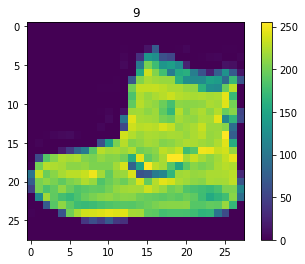

In [122]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.title(trainLabels[0])

In [123]:
# 0~1 사이의 값으로 정규화
trainImages = trainImages / 255.0
testImages = testImages / 255.0

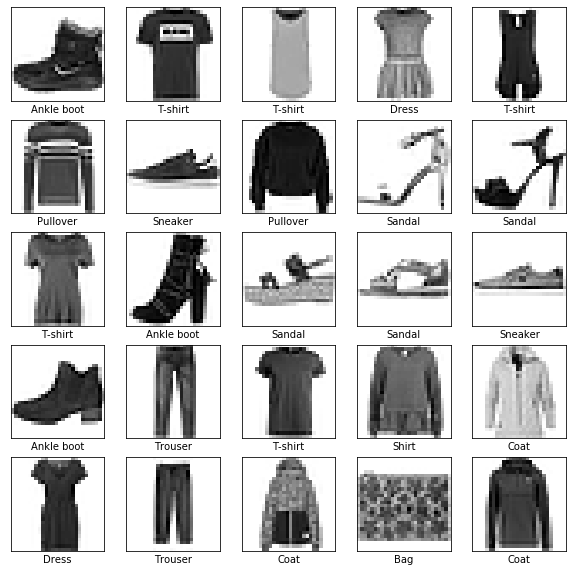

In [124]:
plt.figure(figsize=(10,10))

for i in range(25) :
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])

plt.show()

In [125]:
'''
1. 층 설정 
2. 모델 설정
3. 모델 훈련
4. 정확도 평가
5. 예측
'''

'\n1. 층 설정 \n2. 모델 설정\n3. 모델 훈련\n4. 정확도 평가\n5. 예측\n'

In [126]:
from keras import *
from keras.layers import *

In [127]:
trainImages = trainImages.reshape(trainImages.shape+(1,))
testImages = testImages.reshape(testImages.shape+(1,))

In [129]:
from keras.utils import np_utils

In [131]:
trainLabels = np_utils.to_categorical(trainLabels)
testLabels = np_utils.to_categorical(testLabels)

In [138]:
model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [139]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [140]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 64)         

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
EarlyStopping(patient=10)

In [141]:
model.fit(trainImages, trainLabels, epochs=15, batch_size=200, validation_data=(testImages, testLabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 34s 558us/step - loss: 0.7239 - accuracy: 0.7352 - val_loss: 0.4663 - val_accuracy: 0.8345
Epoch 2/15
60000/60000 [==============================] - 34s 560us/step - loss: 0.4477 - accuracy: 0.8357 - val_loss: 0.3954 - val_accuracy: 0.8575
Epoch 3/15
60000/60000 [==============================] - 32s 534us/step - loss: 0.3865 - accuracy: 0.8580 - val_loss: 0.3447 - val_accuracy: 0.8795
Epoch 4/15
60000/60000 [==============================] - 33s 546us/step - loss: 0.3459 - accuracy: 0.8729 - val_loss: 0.3116 - val_accuracy: 0.8860
Epoch 5/15
60000/60000 [==============================] - 32s 540us/step - loss: 0.3193 - accuracy: 0.8823 - val_loss: 0.2977 - val_accuracy: 0.8906
Epoch 6/15
60000/60000 [==============================] - 33s 548us/step - loss: 0.3039 - accuracy: 0.8880 - val_loss: 0.2844 - val_accuracy: 0.8947
Epoch 7/15
60000/60000 [==============================] 

In [142]:
model.evaluate(testImages, testLabels)

10000/10000 [==============================] - 2s 162us/step


[0.23854747606515883, 0.910099983215332]

In [171]:
pre = model.predict(testImages)

'Ankle boot'

In [172]:
classNames[np.argmax(pre[0])]

'Ankle boot'

In [145]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

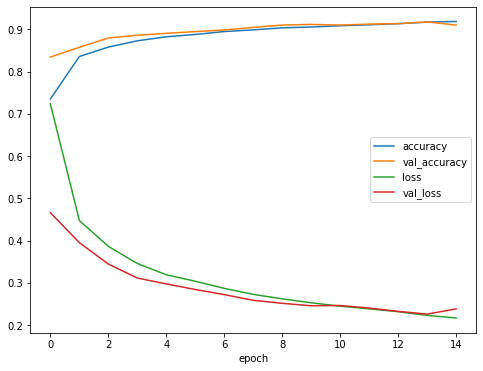

In [164]:
plt.figure(figsize=(8,6))
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val_accuracy')
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')

plt.xlabel('epoch')
# plt.ylabel(['accuracy', 'loss'])

plt.legend()

In [173]:
# 오후 연습문제 예측과 실제중 많이 틀린 이미지 출력

In [176]:
predict_label = np.argmax(pre,1)
test_label = np.argmax(testLabels,1)

In [177]:
import pandas as pd

In [289]:
res = pd.DataFrame({'label':test_label, 'predict':predict_label})

In [290]:
# 예측 틀린 사진들
fault_res = res[res['label'] != res['predict']]
fault_res

,label,predict
12,7,5
23,9,5
25,4,2
42,3,6
43,7,9
...,...,...
9961,6,4
9977,6,0
9979,6,0
9981,0,6


In [324]:
fault_res['count'] = 1

In [337]:
fault_res.groupby(['label','predict']).count()

count
label predict       
0     2           24
      3           12
      4            2
      5            1
      6           77
      8            6
1     0            2
      3           14
      6            2
      8            3
2     0           14
      3            9
      4           20
      6           29
      8            1
3     0           16
      1            4
      2           13
      4            6
      6           24
      8            2
4     0            3
      2           93
      3           54
      5            1
      6           66
5     7           16
      9            4
6     0          115
      2          100
      3           26
      4           47
      8            8
7     5            9
      9           28
8     0            1
      1            1
      2            2
      3            5
      5            1
      6            5
      7            1
9     5            6
      7           26

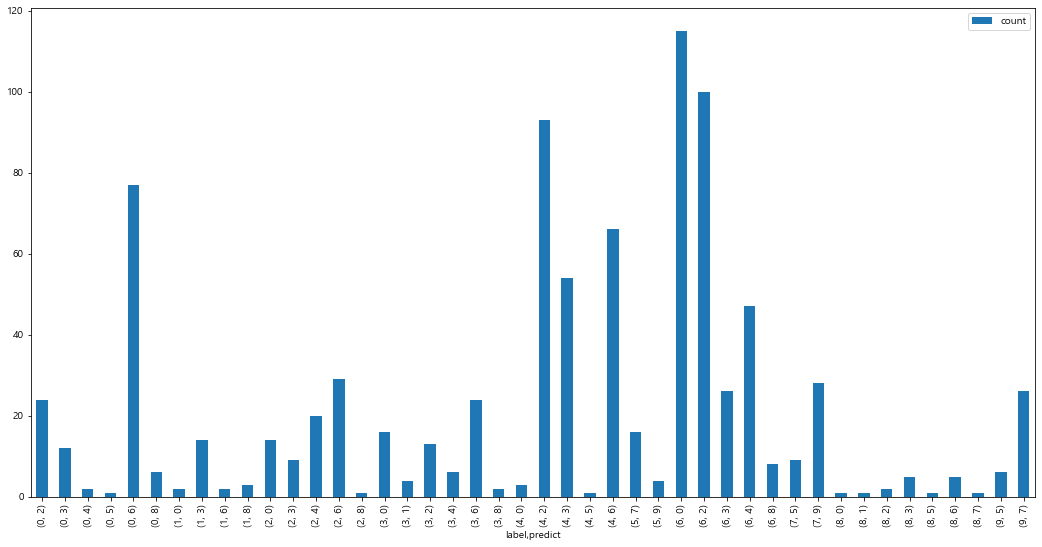

In [331]:
fault_res.groupby(['label','predict']).count().plot.bar(figsize=(18,9))

Text(0.5, 1.0, '예측에 실패한 label')

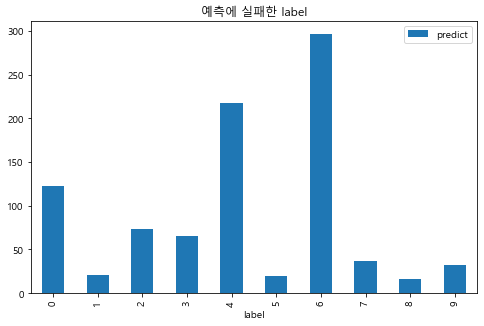

In [285]:
fault_res.groupby(['label']).count().plot.bar(figsize=(8,5))
plt.title('예측에 실패한 label')

In [307]:
# 가장 많이 틀린 label의 index를 list로 저장
six_index = fault_res[fault_res['label'] == 6].index.tolist()

In [311]:
import random

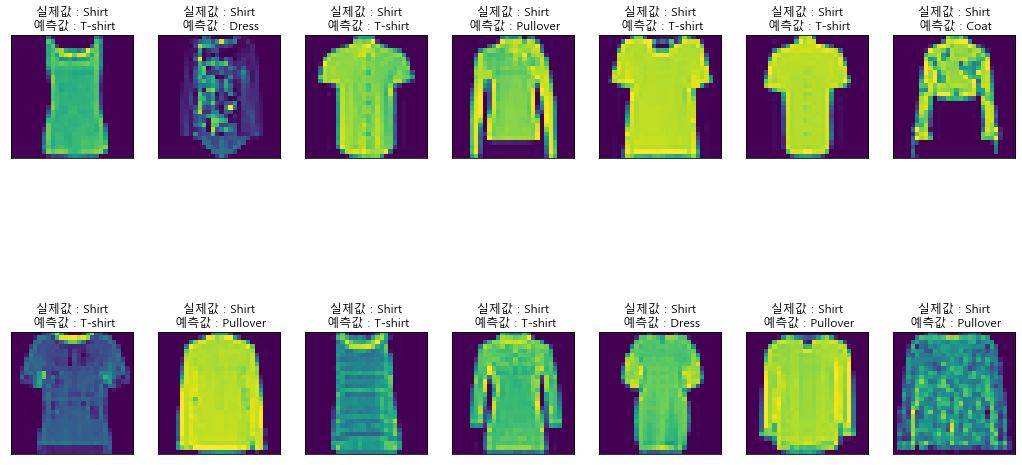

In [344]:
# 
targetlist = []

plt.figure(figsize=(18,10))
for i in range(14) :
    
    target = random.choice(six_index)
    # 중복 출력을 막기위한 조건문
    if target not in targetlist :
        targetlist.append(target)
        
        plt.subplot(2,7,i+1)
        plt.imshow(testImages[target].reshape(28,28))
        plt.xticks([])
        plt.yticks([])

        ans = res.iloc[target]['label']
        pred = res.iloc[target]['predict']
        plt.title('실제값 : {}\n 예측값 : {}'.format(classNames[ans],classNames[pred]))

In [201]:
from PIL import Image

In [247]:
img = np.array(Image.open('data/dog3.jpg').resize((224,224)))

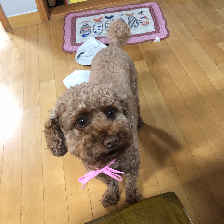

In [248]:
Image.open('data/dog3.jpg').resize((224,224))

In [249]:
yhat = vgg.predict(img.reshape(-1,224,224,3))

In [250]:
labelIdx = np.argmax(yhat.shape)

In [252]:
label = decode_predictions(yhat)
np.shape(label)  # (1, 5, 3)
print('예상품종 : ',label[0][0][1])
print('확률 : ',label[0][0][2])

예상품종 :  toy_poodle
확률 :  0.56854355


In [253]:
label

[[('n02113624', 'toy_poodle', 0.56854355),
  ('n02113712', 'miniature_poodle', 0.27434406),
  ('n02113799', 'standard_poodle', 0.04463003),
  ('n03026506', 'Christmas_stocking', 0.040881723),
  ('n02093647', 'Bedlington_terrier', 0.03833925)]]

In [254]:
# 동물 품종 분류 모델 불러와서 사용
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'data/dog3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

102858752/102853048 [==============================] - 209s 2us/step
Predicted: [('n02113624', 'toy_poodle', 0.75674385), ('n02113712', 'miniature_poodle', 0.22489691), ('n02113799', 'standard_poodle', 0.0070303045)]


In [385]:
import os
import re

# 사진 목록 불러오기
filelist = os.listdir('data/planesnet')

In [386]:
# 사진 이름에서 0으로 시작하면 X 1로 시작하면 O를 나타내는 데이터프레임 생성
label = []
for i in filelist :
    if re.search('0\_\_+',i) :
        label.append('X')
    else :
        label.append('O')
        
df = pd.DataFrame({'filename':filelist, 'label':label})
df['label'].value_counts()

In [419]:
df['label'].value_counts()

X    24936
O     7065
Name: label, dtype: int64

In [388]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(df, test_size=0.3, random_state=777)

In [395]:
from keras.preprocessing.image import ImageDataGenerator

# 이미지 제너레이터 만들기
idg = ImageDataGenerator(rescale=1./255)

# 데이터프레임으로부터 데이터셋 만들기
train_idg = idg.flow_from_dataframe(traindf, directory='data/planesnet',
                       x_col='filename',
                       y_col='label',
                       target_size=(20,20),
                       class_mode='binary',
                       batch_size=200)
test_idg = idg.flow_from_dataframe(testdf, directory='data/planesnet',
                       x_col='filename',
                       y_col='label',
                       target_size=(20,20),
                       class_mode='binary',
                       batch_size=200)

Found 22399 validated image filenames belonging to 2 classes.
Found 9601 validated image filenames belonging to 2 classes.


In [415]:
# 모델 만들기 

model = Sequential()

model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(20,20,3)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 설정하기
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [417]:
# 제너레이터로 모델 학습시키기
model.fit_generator(train_idg, steps_per_epoch=110, epochs=15, validation_data=test_idg, validation_steps=40)

Epoch 1/15
110/110 [==============================] - 19s 172ms/step - loss: 0.1582 - accuracy: 0.7917 - val_loss: 0.0942 - val_accuracy: 0.8673
Epoch 2/15
110/110 [==============================] - 15s 139ms/step - loss: 0.0971 - accuracy: 0.8624 - val_loss: 0.0735 - val_accuracy: 0.9145
Epoch 3/15
110/110 [==============================] - 15s 136ms/step - loss: 0.0790 - accuracy: 0.8914 - val_loss: 0.0751 - val_accuracy: 0.9078
Epoch 4/15
110/110 [==============================] - 15s 136ms/step - loss: 0.0721 - accuracy: 0.9025 - val_loss: 0.0780 - val_accuracy: 0.9118
Epoch 5/15
110/110 [==============================] - 15s 136ms/step - loss: 0.0674 - accuracy: 0.9098 - val_loss: 0.0845 - val_accuracy: 0.9207
Epoch 6/15
110/110 [==============================] - 15s 138ms/step - loss: 0.0655 - accuracy: 0.9126 - val_loss: 0.0758 - val_accuracy: 0.9174
Epoch 7/15
110/110 [==============================] - 15s 140ms/step - loss: 0.0628 - accuracy: 0.9164 - val_loss: 0.0566 - val_ac

In [418]:
# 모델 평가하기
model.evaluate_generator(test_idg)

[0.00024342031974811107, 0.9455264806747437]